In [ ]:
# Talking Data - https://www.kaggle.com/beyondbeneath/talkingdata-mobile-user-demographics/geolocation-visualisations/notebook

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [7]:
os.chdir('D:\Kaggle\TalkingData')

In [8]:
df_events = pd.read_csv('events.csv', dtype = {'device_id':np.str})
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [10]:
df_events_sample = df_events.sample(n=100000)
plt.figure(1, figsize = (12,6))

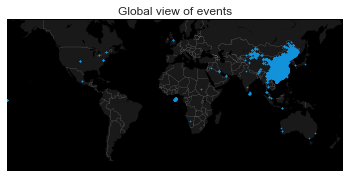

In [11]:
# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

In [45]:
pd.set_option('display.max_columns', 100)

In [49]:
df_events['lon_round'] = df_events['longitude'].round(decimals = 2)
df_events['lat_round'] = df_events['latitude'].round(decimals = 2)

In [99]:
# extract beijing region
lon_min, lon_max = 116, 117
lat_min, lat_max = 39.75,40.25

idx_beijing = (df_events['longitude']>lon_min) & \
             (df_events['longitude']<lon_max) &\
             (df_events['latitude']>lat_min) &\
             (df_events['latitude']>lat_max) 
            
df_events_beijing = df_events[idx_beijing]            

In [100]:
# load the train data
df_train = pd.read_csv('gender_age_train.csv', dtype= {'device_id':np.str})

In [101]:
df_plot = pd.merge(df_train, df_events_beijing, on = 'device_id', how = 'inner')

In [102]:
df_age = pd.pivot_table(df_plot, \
                       values = 'age', \
                       index = 'lon_round', \
                       columns = 'lat_round', \
                       aggfunc = np.mean)

In [103]:
df_count = pd.pivot_table(df_plot, \
                         values = 'age',\
                         index = 'lon_round',\
                         columns = 'lat_round',\
                         aggfunc = 'count')

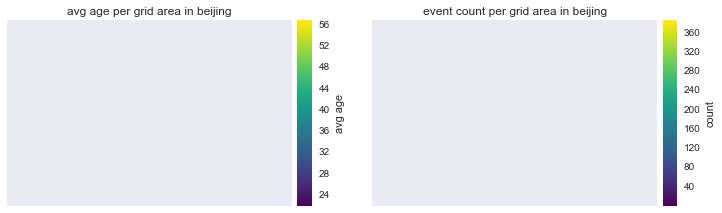

In [108]:
import numpy.ma as ma
plt.figure(5, figsize = (12,6))

plt.subplot(121)

m5a = Basemap(projection = 'merc', 
              llcrnrlat = lat_min,
              urcrnrlat = lat_max, 
              llcrnrlon = lon_min, 
              urcrnrlon = lon_max, 
              lat_ts = 35, 
              resolution = 'c')

# construct a heatmap

lons = df_age.index.values
lats = df_age.columns.values

x, y = np.meshgrid(lons, lats)
px,py = m5a(x,y)

data_values = df_age.values
masked_data = np.ma.masked_invalid(data_values.T)

cmap = plt.cm.viridis
cmap.set_bad(color = '#191919')

m5a.pcolormesh(px, py, masked_data, cmap = cmap, zorder = 5)
m5a.colorbar().set_label('avg age')
plt.title('avg age per grid area in beijing')

# plot count per grid

plt.subplot(122)

m5b = Basemap(projection = 'merc', 
              llcrnrlat = lat_min,
              urcrnrlat = lat_max, 
              llcrnrlon = lon_min, 
              urcrnrlon = lon_max, 
              lat_ts = 35, 
              resolution = 'c')

# construct a heatmap

data_values = df_count.values
masked_data = np.ma.masked_invalid(data_values.T)

cmap = plt.cm.viridis
cmap.set_bad(color = '#191919')

# plot the heatmap
m5b.pcolormesh(px,py,masked_data, cmap = cmap, zorder = 5)
m5b.colorbar().set_label('count')
plt.title('event count per grid area in beijing')

plt.show()

In [ ]:
print df_age

In [ ]:
df_trip = pd.read_csv('D:\\IoT\\telemetry-pologt-20160829.csv')
df_trip.head(2)

In [79]:
data_values = df_age.values
print data_values.T

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  38.  nan ...,  nan  nan  nan]]


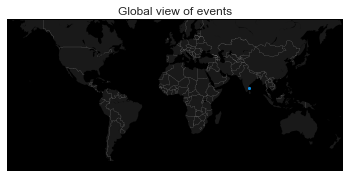

In [43]:
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_trip["Lon"].tolist(), df_trip["Lat"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()